In [10]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [11]:
nba_data = pd.read_csv('../data/final_nba.csv')

In [12]:
nba_data.drop(columns='Unnamed: 0',inplace=True)

In [13]:
nba_data

,name,player_id,age,season,team,MP,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,FG%,Avg_shot_dist,%_2point_attempts,%_FGA_0-3_dist,%_FGA_3-10_dist,%_FGA_10-16_dist,%_FGA_16-3pt_dist,%_3point_attempts,%FG_2point,%_FG_0-3_dist,%_FG_3-10_dist,%_FG_10-16_dist,%_FG_10-16_dist.1,3pt%,assisted_2pters,FG%_dunk_attempts,made_dunks,assisted_3pt%,%_corner_3pters,%_corner_3_made,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,predator_offense,predator_defense,predator_total,pace_impact
0,Bam Adebayo,adebaba01,22,2020,MIA,1865,0.473,8.8,24.2,16.8,22.5,1.8,3.4,17.2,19.9,4.1,3.0,7.1,0.183,0.578,5.7,0.980,0.480,0.307,0.147,0.046,0.020,0.588,0.746,0.462,0.438,0.250,0.083,0.711,0.234,130,1.000,0.667,0.125,-0.795731,2.169670,1.373940,3.506720,0.822734,4.329454,0.014715,1.999088,2.013802,4.648078,4.648078,-0.105324,1.108234,1.002910,-0.772876
1,LaMarcus Aldridge,aldrila01,34,2020,SAS,1661,0.245,6.4,18.1,12.2,11.3,0.9,4.3,7.9,23.3,3.3,1.3,4.6,0.133,0.495,13.7,0.801,0.203,0.129,0.226,0.244,0.199,0.520,0.712,0.475,0.460,0.441,0.392,0.558,0.042,29,0.950,0.183,0.393,-0.407140,0.526252,0.119112,-0.787673,-2.229078,-3.016751,-0.553316,0.024159,-0.529156,1.894905,1.894905,-0.516605,0.485455,-0.031150,-1.422240
2,Nickeil Alexander-Walker,alexani01,21,2020,NOP,501,0.123,1.7,15.3,8.4,20.5,1.0,1.2,14.3,22.9,-0.7,0.3,-0.4,-0.038,0.339,16.3,0.485,0.229,0.172,0.057,0.026,0.515,0.336,0.462,0.205,0.231,0.333,0.342,0.135,0.004,1,0.900,0.188,0.364,-3.090773,-1.731435,-4.822207,0.635783,-3.760455,-3.124671,-2.515123,-2.224647,-4.739770,-0.511053,-0.511053,-0.909961,-2.290986,-3.200948,0.490942
3,Grayson Allen,allengr01,24,2020,MEM,498,0.199,1.1,12.7,7.0,11.7,0.6,0.2,10.7,18.0,0.5,0.2,0.7,0.065,0.449,15.7,0.483,0.188,0.199,0.091,0.006,0.517,0.541,0.758,0.400,0.438,0.000,0.363,0.587,0.063,10,0.970,0.275,0.480,-0.156312,-1.571262,-1.727574,-1.034276,-3.017205,-4.051481,-0.329295,-1.954804,-2.284099,0.118917,0.118917,-0.632824,-2.583428,-3.216252,0.466596
4,Kyle Anderson,anderky01,26,2020,MEM,868,0.254,5.6,18.4,12.1,15.4,1.9,2.4,14.8,13.4,0.7,1.0,1.7,0.096,0.504,10.7,0.799,0.317,0.237,0.129,0.116,0.201,0.575,0.648,0.604,0.448,0.462,0.222,0.534,0.040,9,1.000,0.644,0.172,-0.664942,1.772078,1.107136,-6.238171,2.352928,-3.885243,-1.841386,2.015370,0.173984,1.363175,1.363175,-2.512889,1.281543,-1.231346,0.085884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,Christian Wood,woodch01,24,2020,DET,1013,0.508,8.6,25.3,16.9,6.9,1.2,3.7,11.9,21.9,2.8,1.2,4.0,0.187,0.562,11.4,0.712,0.407,0.219,0.033,0.053,0.288,0.636,0.800,0.419,0.308,0.476,0.381,0.702,0.247,89,0.907,0.283,0.375,1.201009,2.687525,3.888534,2.049796,2.506545,4.556341,1.470918,2.874558,4.345477,3.769059,3.769059,1.233359,1.279606,2.512965,0.112258
490,Delon Wright,wrighde01,27,2020,DAL,1116,0.252,5.5,13.4,9.5,22.0,2.4,1.4,12.4,15.2,2.3,1.2,3.5,0.151,0.472,10.8,0.704,0.373,0.272,0.034,0.025,0.296,0.513,0.645,0.364,0.455,0.250,0.375,0.282,0.019,5,0.806,0.156,0.533,1.725728,0.022286,1.748014,-1.689045,-0.654908,-2.343953,1.064362,-0.121982,0.942380,2.184139,2.184139,1.000805,-0.049582,0.951223,-0.837801
491,Thaddeus Young,youngth01,31,2020,CHI,1296,0.120,6.1,15.8,10.8,11.0,2.4,1.2,14.4,19.7,-0.5,1.6,1.2,0.043,0.449,11.9,0.636,0.331,0.254,0.019,0.032,0.364,0.497,0.594,0.418,0.100,0.353,0.365,0.587,0.049,23,0.929,0.443,0.353,-2.698887,1.002217,-1.696670,-4.052740,0.611666,-3.441073,-3.081703,0.955130,-2.126572,0.435915,0.435915,-3.041606,1.113662,-1.927944,0.560568
492,Trae Young,youngtr01,21,2020,ATL,1760,0.444,1.8,11.8,6.7,45.9,1.5,0.2,16.4,35.0,4.5,0.5,5.1,0.138,0.445,16.7,0.545,0.184,0.167,0.145,0.048,0.455,0.504,0.598,0.459,0.471,0.404,0.374,0.165,0.000,0,0.283,0.033,0.625,6.415434,-2.595577,3.81

In [14]:
nba_no_dups = nba_data.drop_duplicates(subset='name')

In [15]:
nba_no_dups

,name,player_id,age,season,team,MP,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,FG%,Avg_shot_dist,%_2point_attempts,%_FGA_0-3_dist,%_FGA_3-10_dist,%_FGA_10-16_dist,%_FGA_16-3pt_dist,%_3point_attempts,%FG_2point,%_FG_0-3_dist,%_FG_3-10_dist,%_FG_10-16_dist,%_FG_10-16_dist.1,3pt%,assisted_2pters,FG%_dunk_attempts,made_dunks,assisted_3pt%,%_corner_3pters,%_corner_3_made,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,predator_offense,predator_defense,predator_total,pace_impact
0,Bam Adebayo,adebaba01,22,2020,MIA,1865,0.473,8.8,24.2,16.8,22.5,1.8,3.4,17.2,19.9,4.1,3.0,7.1,0.183,0.578,5.7,0.980,0.480,0.307,0.147,0.046,0.020,0.588,0.746,0.462,0.438,0.250,0.083,0.711,0.234,130,1.000,0.667,0.125,-0.795731,2.169670,1.373940,3.506720,0.822734,4.329454,0.014715,1.999088,2.013802,4.648078,4.648078,-0.105324,1.108234,1.002910,-0.772876
1,LaMarcus Aldridge,aldrila01,34,2020,SAS,1661,0.245,6.4,18.1,12.2,11.3,0.9,4.3,7.9,23.3,3.3,1.3,4.6,0.133,0.495,13.7,0.801,0.203,0.129,0.226,0.244,0.199,0.520,0.712,0.475,0.460,0.441,0.392,0.558,0.042,29,0.950,0.183,0.393,-0.407140,0.526252,0.119112,-0.787673,-2.229078,-3.016751,-0.553316,0.024159,-0.529156,1.894905,1.894905,-0.516605,0.485455,-0.031150,-1.422240
2,Nickeil Alexander-Walker,alexani01,21,2020,NOP,501,0.123,1.7,15.3,8.4,20.5,1.0,1.2,14.3,22.9,-0.7,0.3,-0.4,-0.038,0.339,16.3,0.485,0.229,0.172,0.057,0.026,0.515,0.336,0.462,0.205,0.231,0.333,0.342,0.135,0.004,1,0.900,0.188,0.364,-3.090773,-1.731435,-4.822207,0.635783,-3.760455,-3.124671,-2.515123,-2.224647,-4.739770,-0.511053,-0.511053,-0.909961,-2.290986,-3.200948,0.490942
3,Grayson Allen,allengr01,24,2020,MEM,498,0.199,1.1,12.7,7.0,11.7,0.6,0.2,10.7,18.0,0.5,0.2,0.7,0.065,0.449,15.7,0.483,0.188,0.199,0.091,0.006,0.517,0.541,0.758,0.400,0.438,0.000,0.363,0.587,0.063,10,0.970,0.275,0.480,-0.156312,-1.571262,-1.727574,-1.034276,-3.017205,-4.051481,-0.329295,-1.954804,-2.284099,0.118917,0.118917,-0.632824,-2.583428,-3.216252,0.466596
4,Kyle Anderson,anderky01,26,2020,MEM,868,0.254,5.6,18.4,12.1,15.4,1.9,2.4,14.8,13.4,0.7,1.0,1.7,0.096,0.504,10.7,0.799,0.317,0.237,0.129,0.116,0.201,0.575,0.648,0.604,0.448,0.462,0.222,0.534,0.040,9,1.000,0.644,0.172,-0.664942,1.772078,1.107136,-6.238171,2.352928,-3.885243,-1.841386,2.015370,0.173984,1.363175,1.363175,-2.512889,1.281543,-1.231346,0.085884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,Christian Wood,woodch01,24,2020,DET,1013,0.508,8.6,25.3,16.9,6.9,1.2,3.7,11.9,21.9,2.8,1.2,4.0,0.187,0.562,11.4,0.712,0.407,0.219,0.033,0.053,0.288,0.636,0.800,0.419,0.308,0.476,0.381,0.702,0.247,89,0.907,0.283,0.375,1.201009,2.687525,3.888534,2.049796,2.506545,4.556341,1.470918,2.874558,4.345477,3.769059,3.769059,1.233359,1.279606,2.512965,0.112258
490,Delon Wright,wrighde01,27,2020,DAL,1116,0.252,5.5,13.4,9.5,22.0,2.4,1.4,12.4,15.2,2.3,1.2,3.5,0.151,0.472,10.8,0.704,0.373,0.272,0.034,0.025,0.296,0.513,0.645,0.364,0.455,0.250,0.375,0.282,0.019,5,0.806,0.156,0.533,1.725728,0.022286,1.748014,-1.689045,-0.654908,-2.343953,1.064362,-0.121982,0.942380,2.184139,2.184139,1.000805,-0.049582,0.951223,-0.837801
491,Thaddeus Young,youngth01,31,2020,CHI,1296,0.120,6.1,15.8,10.8,11.0,2.4,1.2,14.4,19.7,-0.5,1.6,1.2,0.043,0.449,11.9,0.636,0.331,0.254,0.019,0.032,0.364,0.497,0.594,0.418,0.100,0.353,0.365,0.587,0.049,23,0.929,0.443,0.353,-2.698887,1.002217,-1.696670,-4.052740,0.611666,-3.441073,-3.081703,0.955130,-2.126572,0.435915,0.435915,-3.041606,1.113662,-1.927944,0.560568
492,Trae Young,youngtr01,21,2020,ATL,1760,0.444,1.8,11.8,6.7,45.9,1.5,0.2,16.4,35.0,4.5,0.5,5.1,0.138,0.445,16.7,0.545,0.184,0.167,0.145,0.048,0.455,0.504,0.598,0.459,0.471,0.404,0.374,0.165,0.000,0,0.283,0.033,0.625,6.415434,-2.595577,3.81

In [16]:
stats_ony = nba_data.drop(columns=['name','player_id','age','season','MP','team'])

In [17]:
stats_ony_no_dups = nba_no_dups.drop(columns=['name','player_id','age','season','MP','team','OWS','DWS','WS','WS/48'])

In [18]:
stats_ony_no_dups

,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,FG%,Avg_shot_dist,%_2point_attempts,%_FGA_0-3_dist,%_FGA_3-10_dist,%_FGA_10-16_dist,%_FGA_16-3pt_dist,%_3point_attempts,%FG_2point,%_FG_0-3_dist,%_FG_3-10_dist,%_FG_10-16_dist,%_FG_10-16_dist.1,3pt%,assisted_2pters,FG%_dunk_attempts,made_dunks,assisted_3pt%,%_corner_3pters,%_corner_3_made,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,predator_offense,predator_defense,predator_total,pace_impact
0,0.473,8.8,24.2,16.8,22.5,1.8,3.4,17.2,19.9,0.578,5.7,0.980,0.480,0.307,0.147,0.046,0.020,0.588,0.746,0.462,0.438,0.250,0.083,0.711,0.234,130,1.000,0.667,0.125,-0.795731,2.169670,1.373940,3.506720,0.822734,4.329454,0.014715,1.999088,2.013802,4.648078,4.648078,-0.105324,1.108234,1.002910,-0.772876
1,0.245,6.4,18.1,12.2,11.3,0.9,4.3,7.9,23.3,0.495,13.7,0.801,0.203,0.129,0.226,0.244,0.199,0.520,0.712,0.475,0.460,0.441,0.392,0.558,0.042,29,0.950,0.183,0.393,-0.407140,0.526252,0.119112,-0.787673,-2.229078,-3.016751,-0.553316,0.024159,-0.529156,1.894905,1.894905,-0.516605,0.485455,-0.031150,-1.422240
2,0.123,1.7,15.3,8.4,20.5,1.0,1.2,14.3,22.9,0.339,16.3,0.485,0.229,0.172,0.057,0.026,0.515,0.336,0.462,0.205,0.231,0.333,0.342,0.135,0.004,1,0.900,0.188,0.364,-3.090773,-1.731435,-4.822207,0.635783,-3.760455,-3.124671,-2.515123,-2.224647,-4.739770,-0.511053,-0.511053,-0.909961,-2.290986,-3.200948,0.490942
3,0.199,1.1,12.7,7.0,11.7,0.6,0.2,10.7,18.0,0.449,15.7,0.483,0.188,0.199,0.091,0.006,0.517,0.541,0.758,0.400,0.438,0.000,0.363,0.587,0.063,10,0.970,0.275,0.480,-0.156312,-1.571262,-1.727574,-1.034276,-3.017205,-4.051481,-0.329295,-1.954804,-2.284099,0.118917,0.118917,-0.632824,-2.583428,-3.216252,0.466596
4,0.254,5.6,18.4,12.1,15.4,1.9,2.4,14.8,13.4,0.504,10.7,0.799,0.317,0.237,0.129,0.116,0.201,0.575,0.648,0.604,0.448,0.462,0.222,0.534,0.040,9,1.000,0.644,0.172,-0.664942,1.772078,1.107136,-6.238171,2.352928,-3.885243,-1.841386,2.015370,0.173984,1.363175,1.363175,-2.512889,1.281543,-1.231346,0.085884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,0.508,8.6,25.3,16.9,6.9,1.2,3.7,11.9,21.9,0.562,11.4,0.712,0.407,0.219,0.033,0.053,0.288,0.636,0.800,0.419,0.308,0.476,0.381,0.702,0.247,89,0.907,0.283,0.375,1.201009,2.687525,3.888534,2.049796,2.506545,4.556341,1.470918,2.874558,4.345477,3.769059,3.769059,1.233359,1.279606,2.512965,0.112258
490,0.252,5.5,13.4,9.5,22.0,2.4,1.4,12.4,15.2,0.472,10.8,0.704,0.373,0.272,0.034,0.025,0.296,0.513,0.645,0.364,0.455,0.250,0.375,0.282,0.019,5,0.806,0.156,0.533,1.725728,0.022286,1.748014,-1.689045,-0.654908,-2.343953,1.064362,-0.121982,0.942380,2.184139,2.184139,1.000805,-0.049582,0.951223,-0.837801
491,0.120,6.1,15.8,10.8,11.0,2.4,1.2,14.4,19.7,0.449,11.9,0.636,0.331,0.254,0.019,0.032,0.364,0.497,0.594,0.418,0.100,0.353,0.365,0.587,0.049,23,0.929,0.443,0.353,-2.698887,1.002217,-1.696670,-4.052740,0.611666,-3.441073,-3.081703,0.955130,-2.126572,0.435915,0.435915,-3.041606,1.113662,-1.927944,0.560568
492,0.444,1.8,11.8,6.7,45.9,1.5,0.2,16.4,35.0,0.445,16.7,0.545,0.184,0.167,0.145,0.048,0.455,0.504,0.598,0.459,0.471,0.404,0.374,0.165,0.000,0,0.283,0.033,0.625,6.415434,-2.595577,3.819856,8.640753,-5.339819,3.300934,7.447487,-3.271294,4.176193,6.684782,6.684782,8.333820,-3.600605,4.733215,2.866609


In [19]:
scaler_min_max = MinMaxScaler(feature_range=[0, 1])

In [20]:
data_rescaled = scaler_min_max.fit_transform(stats_ony)

In [21]:
no_dups_rescaled = scaler_min_max.fit_transform(stats_ony_no_dups)

NameError: name 'data_rescaled_X' is not defined

In [23]:
standard_scaler = StandardScaler()

In [24]:
rescaled_no_dups = scaler.fit_transform(stats_ony_no_dups)

NameError: name 'scaler' is not defined

In [25]:
rescaled_no_dups

NameError: name 'rescaled_no_dups' is not defined

In [26]:
kmeans = KMeans(n_clusters = 10)

kmeans.fit(rescaled_no_dups)

y_kmeans = kmeans.predict(rescaled_no_dups)
kmeans.fit(rescaled_no_dups)

y_kmeans = kmeans.predict(rescaled_no_dups)

NameError: name 'rescaled_no_dups' is not defined

In [27]:
y_kmeans

NameError: name 'y_kmeans' is not defined

In [21]:
pca = PCA().fit(stats_ony)

In [93]:
pca = PCA().fit(stats_ony_X)

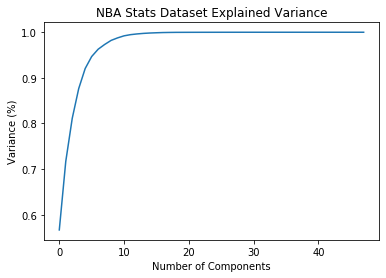

In [25]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('NBA Stats Dataset Explained Variance')
plt.show()

In [26]:
data_mean = np.mean(data_rescaled)

In [27]:
data_center = data_rescaled - data_mean

In [28]:
cov_matrix = np.cov(data_center)

In [29]:
eigenval, eigenvec = np.linalg.eig(cov_matrix)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


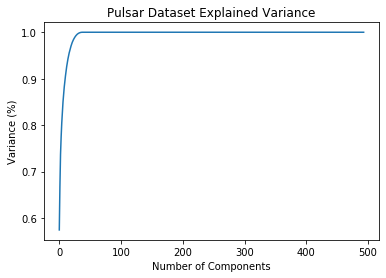

In [30]:
significance = [np.abs(i)/np.sum(eigenval) for i in eigenval]
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(significance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [32]:
pca = PCA(n_components=7)
fit = pca.fit(stats_ony).transform(stats_ony)
print(pca.explained_variance_ratio_)

[0.56668364 0.150191   0.09449993 0.06518598 0.04396785 0.0262308
 0.01600987]


In [35]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(data_rescaled)

In [41]:
silhouette = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(rescaled_no_dups)
    
    centers = kmeans.cluster_centers_

    score = silhouette_score(x3, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.19583795884338306
For n_clusters = 3, silhouette score is 0.1424727866533827
For n_clusters = 4, silhouette score is 0.1090004227555243
For n_clusters = 5, silhouette score is 0.10462713480418533
For n_clusters = 6, silhouette score is 0.09790694490826642
For n_clusters = 7, silhouette score is 0.09824831259027267
For n_clusters = 8, silhouette score is 0.10673488085747049
For n_clusters = 9, silhouette score is 0.09983498106124038
For n_clusters = 10, silhouette score is 0.10059542862691298
For n_clusters = 11, silhouette score is 0.08836493100833044
For n_clusters = 12, silhouette score is 0.10073550816359396
For n_clusters = 13, silhouette score is 0.11883279757286772
For n_clusters = 14, silhouette score is 0.1014586647166426
For n_clusters = 15, silhouette score is 0.10857568421731675
For n_clusters = 16, silhouette score is 0.10654783634305452
For n_clusters = 17, silhouette score is 0.10124107898979064
For n_clusters = 18, silhouette sco

In [162]:
silhouette = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(rescaled_no_dups)
    
    centers = kmeans.cluster_centers_

    score = silhouette_score(rescaled_no_dups, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.1770427918805728
For n_clusters = 3, silhouette score is 0.1493772331726132
For n_clusters = 4, silhouette score is 0.11432047883032748
For n_clusters = 5, silhouette score is 0.10136046460807023
For n_clusters = 6, silhouette score is 0.10063558660546588
For n_clusters = 7, silhouette score is 0.09721267868650939
For n_clusters = 8, silhouette score is 0.0935233735858098
For n_clusters = 9, silhouette score is 0.08359091525011311
For n_clusters = 10, silhouette score is 0.08637053238878115
For n_clusters = 11, silhouette score is 0.08892161966347249
For n_clusters = 12, silhouette score is 0.08622018305314681
For n_clusters = 13, silhouette score is 0.08186398177544152
For n_clusters = 14, silhouette score is 0.07571848068020885
For n_clusters = 15, silhouette score is 0.07759534096435523
For n_clusters = 16, silhouette score is 0.07190505824732367
For n_clusters = 17, silhouette score is 0.06941627773738748
For n_clusters = 18, silhouette sco

In [163]:
silhouette_diff = []

for i in range(1, len(silhouette)):
    improvement = 1 - ((1 - silhouette[i]) / (1 - silhouette[i - 1]))
    silhouette_diff.append(improvement)
    print("For n_cluster = {}, percent improvement = {}".format(i + 2, improvement))

For n_cluster = 3, percent improvement = -0.03361725061158327
For n_cluster = 4, percent improvement = -0.04121304497061451
For n_cluster = 5, percent improvement = -0.014632848465482962
For n_cluster = 6, percent improvement = -0.0008066393409769113
For n_cluster = 7, percent improvement = -0.00380591878884462
For n_cluster = 8, percent improvement = -0.004086571680395279
For n_cluster = 9, percent improvement = -0.010957213949340572
For n_cluster = 10, percent improvement = 0.003033161919631877
For n_cluster = 11, percent improvement = 0.002792255903655838
For n_cluster = 12, percent improvement = -0.002965097919816584
For n_cluster = 13, percent improvement = -0.004767232977699543
For n_cluster = 14, percent improvement = -0.006693453881829514
For n_cluster = 15, percent improvement = 0.002030615396841129
For n_cluster = 16, percent improvement = -0.006168965715091623
For n_cluster = 17, percent improvement = -0.0026816012004506895
For n_cluster = 18, percent improvement = -0.002800

Text(0.5, 0.98, 'Finding the right number of clusters')

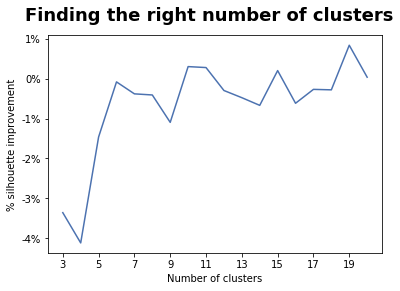

In [164]:
plt.style.use('seaborn-deep')

silhouette_imp_fig, ax = plt.subplots()

ax.plot(range(3, 21), silhouette_diff)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('% silhouette improvement')

ax.set_xticks(np.arange(3, 21, 2.0))

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

silhouette_imp_fig.suptitle("Finding the right number of clusters", weight = 'bold', size = 18)

In [109]:
kmeans = KMeans(n_clusters = 10)

kmeans.fit(data_rescaled_X)

y_kmeans = kmeans.predict(data_rescaled_X)
kmeans.fit(data_rescaled_X)

y_kmeans = kmeans.predict(data_rescaled_X)

In [151]:
nba_no_dups['cluster'] = y_kmeans

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
nba_no_dups[nba_no_dups['cluster'] ==1]

KeyError: 'cluster'

In [1]:
nba_no_dups[nba_no_dups['cluster'] ==0]

NameError: name 'nba_no_dups' is not defined

In [171]:
nba_no_dups.to_csv('../data/clusters_w_all_data_2020.csv')

In [5]:
nba_clusters = pd.read_csv('../data/clusters_w_all_data_2020.csv')

In [33]:
nba_clusters[nba_clusters['cluster'] ==0].describe()

,Unnamed: 0,age,season,MP,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,FG%,Avg_shot_dist,%_2point_attempts,%_FGA_0-3_dist,%_FGA_3-10_dist,%_FGA_10-16_dist,%_FGA_16-3pt_dist,%_3point_attempts,%FG_2point,%_FG_0-3_dist,%_FG_3-10_dist,%_FG_10-16_dist,%_FG_10-16_dist.1,3pt%,assisted_2pters,FG%_dunk_attempts,made_dunks,assisted_3pt%,%_corner_3pters,%_corner_3_made,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,predator_offense,predator_defense,predator_total,pace_impact,cluster
count,34.000000,34.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0
mean,237.735294,24.676471,2020.0,814.500000,0.189618,2.302941,10.997059,6.611765,17.855882,1.458824,0.835294,14.070588,19.582353,-0.197059,0.485294,0.279412,0.011235,0.377735,16.264706,0.561941,0.189294,0.137941,0.117941,0.116824,0.438059,0.418176,0.532500,0.300882,0.383147,0.386853,0.328088,0.344471,0.012206,3.058824,0.761000,0.178676,0.350353,-2.330885,-1.387955,-3.718840,-3.165924,0.395317,-2.770607,-2.630386,-1.080301,-3.710687,-0.309771,-0.309771,-2.419042,-1.367708,-3.786750,-0.231335,0.0
std,145.946297,4.339533,0.0,430.638866,0.079598,0.879216,2.813009,1.583966,7.490082,0.415690,0.561320,4.001706,3.537117,0.739978,0.361086,0.895707,0.051700,0.038074,1.961583,0.099802,0.072223,0.051999,0.043936,0.068848,0.099802,0.044429,0.064503,0.103732,0.125100,0.190314,0.055540,0.150610,0.015503,3.868609,0.118133,0.061857,0.127645,1.827686,1.895859,2.525118,3.047088,2.840753,3.501602,1.823788,2.015993,2.438247,0.918924,0.918924,1.927596,1.746059,2.375707,0.648426,0.0
min,2.000000,19.000000,2020.0,254.000000,0.056000,0.600000,5.300000,3.400000,6.700000,0.700000,0.100000,7.600000,13.000000,-1.700000,-0.200000,-1.500000,-0.086000,0.296000,11.600000,0.256000,0.066000,0.049000,0.033000,0.008000,0.275000,0.336000,0.375000,0.000000,0.000000,0.000000,0.159000,0.111000,0.000000,0.000000,0.533000,0.038000,0.000000,-7.254066,-5.725819,-10.901651,-12.266334,-5.824298,-9.492790,-7.804460,-6.022015,-10.980970,-2.966326,-2.966326,-9.305104,-6.913992,-11.268545,-1.713870,0.0
25%,116.750000,21.000000,2020.0,465.500000,0.130000,1.725000,8.825000,5.525000,11.750000,1.200000,0.425000,11.425000,17.350000,-0.600000,0.225000,-0.350000,-0.028000,0.341250,15.300000,0.509000,0.140000,0.099500,0.089500,0.069250,0.385500,0.393250,0.500000,0.228000,0.317000,0.303250,0.297750,0.234250,0.000000,0.000000,0.684000,0.133000,0.300000,-3.513521,-2.618811,-5.108480,-4.927440,-1.266870,-4.912191,-3.452511,-2.388513,-5.516329,-0.585928,-0.585928,-3.463722,-2.114319,-5.515094,-0.540249,0.0
50%,240.500000,24.000000,2020.0,718.000000,0.175500,2.250000,10.400000,6.450000,17.200000,1.400000,0.750000,12.800000,19.400000,-0.150000,0.400000,0.100000,0.017000,0.384500,16.100000,0.571500,0.183000,0.134000,0.116500,0.105500,0.428500,0.421000,0.535000,0.334000,0.383000,0.355000,0.338000,0.342500,0.006000,1.000000,0.780000,0.179000,0.362000,-2.208753,-1.431431,-3.499622,-3.073657,0.247205,-2.152849,-2.481536,-1.022102,-3.559001,-0.238204,-0.238204,-2.130072,-1.421462,-3.204441,-0.132220,0.0
75%,377.750000,27.750000,2020.0,1172.500000,0.218750,2.750000,13.000000,7.650000,21.775000,1.700000,1.200000,15.675000,22.725000,0.275000,0.775000,0.875000,0.047500,0.407750,17.375000,0.614500,0.221250,0.157000,0.134750,0.172750,0.491000,0.444750,0.568500,0.361750,0.434250,0.435750,0.358750,0.462750,0.021000,5.500000,0.859250,0.198500,0.408250,-0.916261,0.126044,-2

In [37]:
nba_clusters[nba_clusters['cluster'] ==0].mean().sort_values(ascending = False)

season                  2020.000000
MP                       814.500000
Unnamed: 0               237.735294
age                       24.676471
USG%                      19.582353
AST%                      17.855882
Avg_shot_dist             16.264706
TOV%                      14.070588
DRB%                      10.997059
TRB%                       6.611765
made_dunks                 3.058824
ORB%                       2.302941
STL%                       1.458824
BLK%                       0.835294
assisted_3pt%              0.761000
%_2point_attempts          0.561941
%_FG_0-3_dist              0.532500
DWS                        0.485294
%_3point_attempts          0.438059
%FG_2point                 0.418176
raptor_onoff_defense       0.395317
%_FG_10-16_dist.1          0.386853
%_FG_10-16_dist            0.383147
FG%                        0.377735
%_corner_3_made            0.350353
assisted_2pters            0.344471
3pt%                       0.328088
%_FG_3-10_dist             0

In [38]:
nba_clusters[nba_clusters['cluster'] ==1].mean().sort_values(ascending = False)

season                  2020.000000
MP                       984.500000
Unnamed: 0               265.875000
age                       26.750000
made_dunks                19.156250
DRB%                      16.834375
Avg_shot_dist             14.818750
USG%                      14.253125
TOV%                      12.743750
TRB%                      11.056250
AST%                       8.056250
ORB%                       5.125000
BLK%                       2.243750
WS                         2.075000
STL%                       1.462500
war_reg_season             1.340745
war_total                  1.340745
DWS                        1.196875
raptor_defense             1.047290
raptor_onoff_defense       1.037496
cluster                    1.000000
raptor_box_defense         0.994073
assisted_3pt%              0.975562
OWS                        0.875000
predator_defense           0.845568
assisted_2pters            0.698844
%_FG_0-3_dist              0.670938
%FG_2point                 0

In [42]:
nba_clusters.columns

Index(['Unnamed: 0', 'name', 'player_id', 'age', 'season', 'team', 'MP', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'FG%', 'Avg_shot_dist', '%_2point_attempts',
       '%_FGA_0-3_dist', '%_FGA_3-10_dist', '%_FGA_10-16_dist',
       '%_FGA_16-3pt_dist', '%_3point_attempts', '%FG_2point', '%_FG_0-3_dist',
       '%_FG_3-10_dist', '%_FG_10-16_dist', '%_FG_10-16_dist.1', '3pt%',
       'assisted_2pters', 'FG%_dunk_attempts', 'made_dunks', 'assisted_3pt%',
       '%_corner_3pters', '%_corner_3_made', 'raptor_box_offense',
       'raptor_box_defense', 'raptor_box_total', 'raptor_onoff_offense',
       'raptor_onoff_defense', 'raptor_onoff_total', 'raptor_offense',
       'raptor_defense', 'raptor_total', 'war_total', 'war_reg_season',
       'predator_offense', 'predator_defense', 'predator_total', 'pace_impact',
       'cluster'],
      dtype='object')

In [43]:
x = nba_clusters.drop(columns=['raptor_box_offense',
       'raptor_box_defense', 'raptor_box_total', 'raptor_onoff_offense',
       'raptor_onoff_defense', 'raptor_onoff_total', 'raptor_offense',
       'raptor_defense', 'raptor_total', 'war_total', 'war_reg_season',
       'predator_offense', 'predator_defense', 'predator_total'])

In [50]:
x[x['cluster'] ==0].mean().sort_values(ascending = False)

season               2020.000000
MP                    814.500000
Unnamed: 0            237.735294
age                    24.676471
USG%                   19.582353
AST%                   17.855882
Avg_shot_dist          16.264706
TOV%                   14.070588
DRB%                   10.997059
TRB%                    6.611765
made_dunks              3.058824
ORB%                    2.302941
STL%                    1.458824
BLK%                    0.835294
assisted_3pt%           0.761000
%_2point_attempts       0.561941
%_FG_0-3_dist           0.532500
DWS                     0.485294
%_3point_attempts       0.438059
%FG_2point              0.418176
%_FG_10-16_dist.1       0.386853
%_FG_10-16_dist         0.383147
FG%                     0.377735
%_corner_3_made         0.350353
assisted_2pters         0.344471
3pt%                    0.328088
%_FG_3-10_dist          0.300882
WS                      0.279412
FTr                     0.189618
%_FGA_0-3_dist          0.189294
%_corner_3

In [51]:
x[x['cluster'] ==1].mean().sort_values(ascending = False)

season               2020.000000
MP                    984.500000
Unnamed: 0            265.875000
age                    26.750000
made_dunks             19.156250
DRB%                   16.834375
Avg_shot_dist          14.818750
USG%                   14.253125
TOV%                   12.743750
TRB%                   11.056250
AST%                    8.056250
ORB%                    5.125000
BLK%                    2.243750
WS                      2.075000
STL%                    1.462500
DWS                     1.196875
cluster                 1.000000
assisted_3pt%           0.975562
OWS                     0.875000
assisted_2pters         0.698844
%_FG_0-3_dist           0.670938
%FG_2point              0.558281
%_2point_attempts       0.506500
%_3point_attempts       0.493500
FG%                     0.452781
%_FG_10-16_dist.1       0.391688
%_corner_3_made         0.367250
%_FG_3-10_dist          0.357250
3pt%                    0.342594
%_corner_3pters         0.321062
%_FG_10-16

In [62]:
x[x['cluster'] ==9]['name']

5      Giannis Antetokounmpo
54              Jimmy Butler
76             Anthony Davis
86               Luka Doncic
94               Joel Embiid
130             James Harden
167             LeBron James
171             Nikola Jokic
193            Kawhi Leonard
306       Karl-Anthony Towns
Name: name, dtype: object

In [41]:
nba_clusters[nba_clusters['cluster'] ==0]

,Unnamed: 0,name,player_id,age,season,team,MP,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,FG%,Avg_shot_dist,%_2point_attempts,%_FGA_0-3_dist,%_FGA_3-10_dist,%_FGA_10-16_dist,%_FGA_16-3pt_dist,%_3point_attempts,%FG_2point,%_FG_0-3_dist,%_FG_3-10_dist,%_FG_10-16_dist,%_FG_10-16_dist.1,3pt%,assisted_2pters,FG%_dunk_attempts,made_dunks,assisted_3pt%,%_corner_3pters,%_corner_3_made,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,predator_offense,predator_defense,predator_total,pace_impact,cluster
2,2,Nickeil Alexander-Walker,alexani01,21,2020,NOP,501,0.123,1.7,15.3,8.4,20.5,1.0,1.2,14.3,22.9,-0.7,0.3,-0.4,-0.038,0.339,16.3,0.485,0.229,0.172,0.057,0.026,0.515,0.336,0.462,0.205,0.231,0.333,0.342,0.135,0.004,1,0.900,0.188,0.364,-3.090773,-1.731435,-4.822207,0.635783,-3.760455,-3.124671,-2.515123,-2.224647,-4.739770,-0.511053,-0.511053,-0.909961,-2.290986,-3.200948,0.490942,0
6,6,Carmelo Anthony,anthoca01,35,2020,POR,1299,0.187,4.2,16.6,10.5,6.7,1.2,1.2,10.4,21.9,-0.3,0.8,0.5,0.018,0.419,14.5,0.708,0.200,0.097,0.228,0.183,0.292,0.444,0.525,0.456,0.410,0.389,0.360,0.427,0.031,12,0.919,0.180,0.516,-2.890136,-3.671839,-6.561975,1.925861,-3.050475,-1.124614,-2.094426,-3.731241,-5.825667,-2.065229,-2.065229,-1.349973,-3.269737,-4.619710,-1.142194,0
10,15,D.J. Augustin,augusdj01,32,2020,ORL,1013,0.399,1.5,8.7,5.0,27.2,1.3,0.1,12.4,18.8,1.5,0.8,2.3,0.108,0.390,17.2,0.579,0.177,0.177,0.131,0.095,0.421,0.426,0.569,0.241,0.535,0.355,0.341,0.160,0.000,0,0.574,0.123,0.294,0.166881,-2.190797,-2.023917,-3.436023,5.002608,1.566585,-0.530462,-0.867571,-1.398033,0.697854,0.697854,-0.967997,-0.863065,-1.831063,-1.713870,0
11,16,Dwayne Bacon,bacondw01,24,2020,CHA,687,0.217,2.3,14.0,7.9,11.6,1.7,0.3,12.2,19.4,-1.2,0.4,-0.8,-0.054,0.348,11.6,0.725,0.320,0.238,0.107,0.061,0.275,0.373,0.449,0.345,0.231,0.333,0.284,0.470,0.012,3,0.895,0.149,0.300,-5.284590,-1.092101,-6.376691,-2.822163,1.925780,-0.896382,-5.033294,-0.487714,-5.521008,-0.966704,-0.966704,-4.654743,-1.642332,-6.297075,-0.478437,0
38,60,Ky Bowman,bowmaky01,22,2020,GSW,875,0.127,2.4,10.1,6.1,20.2,2.0,0.6,15.9,16.8,-0.5,0.4,0.0,-0.001,0.405,14.8,0.659,0.216,0.155,0.145,0.142,0.341,0.456,0.641,0.261,0.442,0.405,0.307,0.449,0.044,11,0.710,0.248,0.440,-3.394027,-1.150370,-4.544398,-3.014934,3.220389,0.205455,-3.458838,-0.249714,-3.708552,-0.439267,-0.439267,-3.653488,0.445554,-3.207934,-0.542462,0
43,65,Dillon Brooks,brookdi01,24,2020,MEM,1528,0.194,3.7,8.8,6.3,10.3,1.6,1.2,9.8,24.5,0.2,1.1,1.3,0.040,0.407,15.4,0.615,0.189,0.146,0.172,0.109,0.385,0.426,0.500,0.354,0.436,0.381,0.376,0.537,0.013,8,0.884,0.114,0.353,-0.922961,-1.313864,-2.236825,1.493610,-0.830368,0.663242,-0.476155,-1.284399,-1.760554,0.801806,0.801806,-0.492552,-0.290696,-0.783248,0.213419,0
56,85,Jevon Carter,carteje01,24,2020,PHO,578,0.105,3.9,10.7,7.3,12.9,2.5,1.6,15.0,13.8,0.2,0.6,0.8,0.068,0.410,18.4,0.449,0.154,0.083,0.077,0.135,0.551,0.400,0.500,0.231,0.333,0.429,0.419,0.357,0.006,1,0.889,0.267,0.348,-0.193168,0.460033,0.266865,-3.378512,1.290633,-2.087879,-0.880733,0.676018,-0.204714,0.772038,0.772038,-0.864804,0.860935,-0.003870,-0.932944,0
66,106,Mike Conley,conlemi01,32,2020,UTA,893,0.263,2.4,9.8,6.3,22.2,1.2,0.4,12.2,23.6,0.5,0.9,1.4,0.073,0.390,15.7,0.585,0.144,0.210,0.152,0.078,0.415,0.416,0.561,0.361,0.333,0.452,0.354,0.229,0.000,0,0.586,0.189,0.387,0.286278,-1.395101,-1.108823,-3.746737,-0.361929,-4.108666,-0.591914,-1.288412,-1.880326,0.410864,0.410864,-0.017874,-0.710353,-0.728227,-0.112456,0
68,108,Quinn Cook,cookqu01,26,2020,LAL,387,0.056,2.0,8.8,5.5,13.8,1.2,0.2,12.3,20.4,0.0,0.4,0.4,0.046,0.444,15.6,0.625,0.206,0.125,0.094,0.200,0.375,0.480,0.636,0.350,0.667,0.313,0.383,0.333,0.000,0,0.783,0.250,0.400,-0.429383,-1.638247,-2.067631,-0.102504,2.946326,2.843822,-0.458088,-0.850687,-1.308775,0.283515,0.283515,-1.134501,-2.136606,-3.271108,-0.376742,0
79,143,Matthew D

In [65]:
x.groupby(['team','cluster']).count().head(50)['name']

team  cluster
ATL   0          3
      2          1
      3          2
      5          4
      6          1
      8          2
BOS   0          1
      1          1
      2          1
      4          3
      5          3
      6          1
      7          1
      8          1
BRK   0          1
      1          3
      2          1
      6          2
      8          3
CHA   0          2
      3          4
      5          2
      6          1
      7          2
CHI   0          1
      2          1
      3          4
      5          1
      6          1
      7          3
      8          1
CLE   0          3
      1          1
      2          1
      3          2
      4          2
      5          1
      8          1
DAL   1          2
      2          2
      3          1
      4          2
      5          2
      6          1
      8          1
      9          1
DEN   1          2
      2          1
      3          1
      4          5
Name: name, dtype: int64